**Final Project: Group 4**

For our overarching metric we chose to analyze was security in the city of Pittsburgh. The submetrics were as follows:

Daniel Fritsch: Fire Incidents

Sahil Mishra: Smart Trash Containers

Harris Roberts: Arrest Data

We chose these categories because we believe them to be good indicators of neighborhood security and safety and provide a good basis to produce an assumption based on which neighborhood is best. We will determine which neighborhood ends up being the best based on our metrics by using a system of scoring each neighborhood on a scale of 1-10 and then using this analysis across the respective categories to determine an overall winner. 

**Metric 1: Fire Incidents**

This category tracks the number of fires in the 

My portion of the project was the section on fire incidents in Pittsburgh. I found a data set which had a very intuitive system of tracking fire related occurences in different neighborhoods of the city. Naturally, the areas that have the least amount of fires would be the ones that are considered "best" from a habitability and safety perspective so the ones with the least fires will receive the highest ratings in my portion of the project.


In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

Above I import all the necessary libraries for this activity and below I import the data set I found regarding fire incidents. As can be seen this is a very broad selection of data with all kinds of values that are not relevant for my particular assessment including call_no, type_description, and alarm_time. Though these provide valuable information about the fires it is not relevant for my assessment.

In [47]:
data = pd.read_csv("FireIncidents.csv", parse_dates=True)
data

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,11092,F230099124,112.0,Fires in structure other than in a building,"RAILROAD ST & 30TH ST, PITTSBURGH PA",1,2023-11-21T10:12:00,231EN03,203.0,Strip District,7.0,6.0,4.200302e+10,6.0,6.0,2.0,3-2,40.460192,-79.974403
9565,11093,F230100291,113.0,"Cooking fire, confined to container","100 BLOCK WINSLOW ST, PITTSBURGH PA",1,2023-11-25T14:01:35,231EN08,1204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-12,NaN,NaN
9566,11094,F230099682,150.0,"Outside rubbish fire, Other","00 BLOCK BIRMINGHAM BRG, PITTSBURGH PA",0,2023-11-23T07:41:36,231EN24,1609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-24B,NaN,NaN
9567,11095,F230099779,113.0,"Cooking fire, confined to container","1900 BLOCK WOODWARD AVE, PITTSBURGH PA",1,2023-11-23T14:33:36,231EN26,1917.0,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.404723,-80.017322


Below I use the .groupby command in order to sort the data by neighborhoods which is the factor we care about most. In this I sort all the rows of the table into their respective neighborhoods and get the count as shown in chart below.

In [48]:
data.groupby("neighborhood").count()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,
Allegheny Center,62,62,61,62,62,62,61,62,61,62,62,62,62,62,62,62,59,59
Allegheny West,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,42,42
Allentown,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,121,121
Arlington,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Arlington Heights,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
West End,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
West Oakland,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


The next step is to get rid of the unnecessary data which I do in this step. This way we just get the number of fire occurrences in the various neighborhoods without all the excess information.

In [49]:
chart = data["neighborhood"].value_counts().sort_values(ascending=False)
chart

Carrick                      284
Central Business District    266
South Side Flats             261
Squirrel Hill South          253
Hazelwood                    244
                            ... 
Ridgemont                     12
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

As can be seen here we have a list of all the neighborhoods in the data set and their respective amount of fires. However, here we have the largest amounts at the top which we do not want to focus on for this analysis because the neighborhoods with the least amount of fires will be the best. Therefor, we will take the .tail() of this data to get the 20 lowest count values, making these the safest neighborhoods that should be considered.

In [50]:
bottom_20 = chart.tail(20)
print(bottom_20)

Spring Garden           24
Hays                    24
South Shore             23
Windgap                 23
Esplen                  22
West End                22
Bon Air                 22
New Homestead           21
Summer Hill             21
Glen Hazel              20
Chartiers City          17
Swisshelm Park          16
St. Clair               13
Arlington Heights       13
Oakwood                 13
Ridgemont               12
East Carnegie           11
Mt. Oliver              11
Regent Square            9
Mount Oliver Borough     6
Name: neighborhood, dtype: int64


The following section contains several charts displaying the fire incidents data in a variety of ways. I used bar graphs to show the comparative amount of occurrences between the different neighborhoods. I compare all of them in the top chart which can get confusing because of the shear amount of data here and then look at smaller data sets to get a better idea of the comparison between the safest neighborhoods.

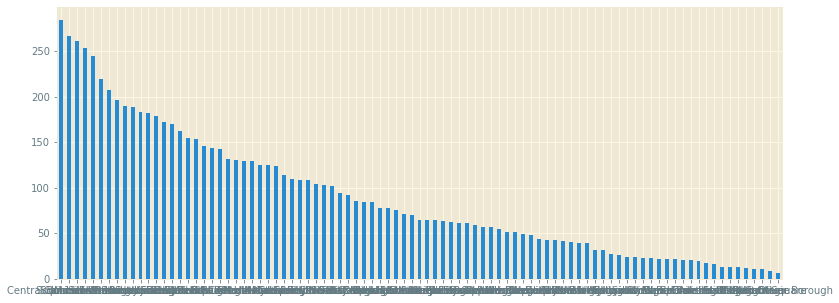

In [51]:
chart.plot.bar(rot = 0)

This is a bit too detailed and you cant see any of the names of the neighborhoods because there are just way too many of them. This is not a practical way to look at the data. Lets simplify it a bit and show only the 20 neighborhoods with the lowest number of fire incidents. 

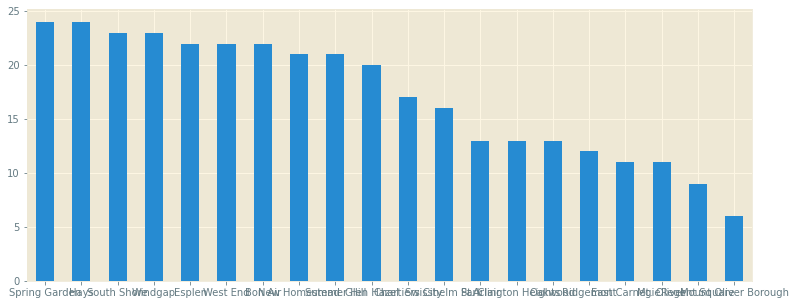

In [52]:
detailed = chart.tail(20)
detailed.plot.bar(rot = 0)

This is better but you still cant read the names. Lets simplify even further so we can actually see whats going on.

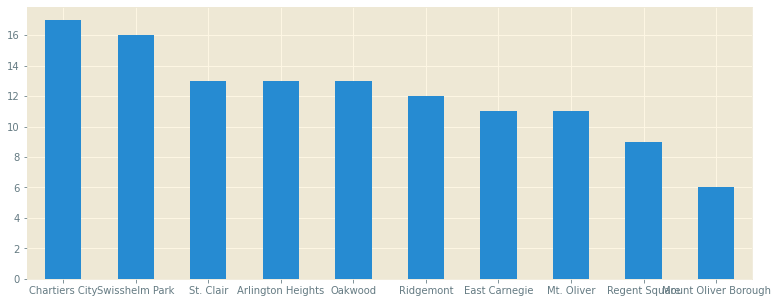

In [53]:
detailed = chart.tail(10)
detailed.plot.bar(rot = 0)

This is better. Now we can see what neighborhoods actually are the best in terms of fire incidents which would be the most desirable to inhabit. Lets look at the top 5 which would receive a score of 10 for this particular metric:

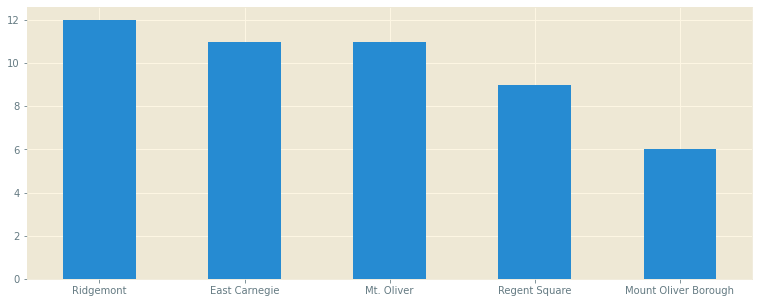

In [54]:
detailed = chart.tail(5)
detailed.plot.bar(rot = 0)

These are by far the best neighborhoods...

Conclusion for Metric 1:

**Metric 2: Smart Trash Containers**

This category...

To start off, I import everything necessary for the data visualization. I also change the font size and theme of the graphs for later.

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

plt.rcParams.update({'font.size': 8})
plt.style.use('Solarize_Light2')

Next, I import the file containing all of the smart trash can data. I then print it out to see what it looks like.

In [29]:
data = pd.read_csv("SmartTrashContainers.csv", parse_dates=True)
data

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,227494,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,227495,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,227496,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,227497,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,227498,5,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,228683,1335,74,2021-08-17T09:17:16,2022-12-31T01:50:30,2nd Division,300 Larimer Avenue,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-10,-79.915790,40.464430
1190,228684,1336,74,2021-08-17T09:17:16,2022-12-31T01:38:18,2nd Division,25 Meadow Street,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.914449,40.465254
1191,228685,1337,74,2021-08-17T09:17:16,2022-12-31T01:44:35,2nd Division,6525 Meadow Street,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.910416,40.461669
1192,228686,1338,74,2021-08-17T09:17:16,2022-12-31T01:46:30,2nd Division,722 Larimer Avenue,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.910430,40.466880


This is what the base table looks like, but not everything here is necessary to find out what the best neighborhood is. The main thing we need to look for is how many smart trash cans each neighborhood has. So, I sort the table by the category "neighborhood" to see what I am looking for.

In [30]:
data.groupby("neighborhood").count()

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,dpw_division,council_district,ward,fire_zone,x,y
neighborhood,,,,,,,,,,,,,,,,
Allegheny Center,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Allegheny West,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Allentown,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Arlington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Banksville,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
West End,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
West Oakland,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


By sorting by the category "neighborhood", I realize that pandas sorts the table based on how many trash cans are in each neighborhood. Using this, I can sort the data using value_counts to rank the neighborhoods on how many trash in each neighborhood. By using ascending=False, it sorts the neighborhoods from greatest to least.

In [31]:
chart = data["neighborhood"].value_counts().sort_values(ascending=False)
chart

Shadyside              76
East Liberty           68
Squirrel Hill South    63
Bloomfield             58
North Shore            53
                       ..
Mt. Oliver              1
East Carnegie           1
Windgap                 1
South Shore             1
Swisshelm Park          1
Name: neighborhood, Length: 79, dtype: int64

Now that I have the data sorted the way I want, we need to vizualize it as a graph, making sure the labels are at the proper orientation.

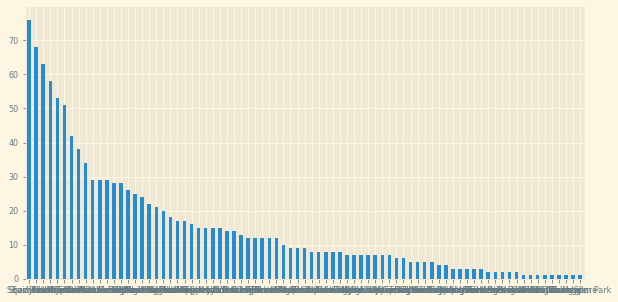

In [32]:
chart.plot.bar(rot = 0)

This graph is way too big! You can't even see the labels! For the sake of actually being able to read the graph, I decided to use the top five entries of the data table.

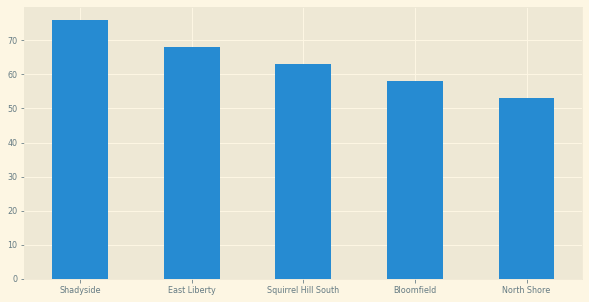

In [33]:
detailed = chart.head(5)
detailed.plot.bar(rot = 0)

Using the data from the graph, you see that according to how many smart trash cans each neighborhood has, the best neighborhood is Shadyside with 76 smart trash cans.

Conclusion for Metric 2:

**Metric 3: Arrest Data**

This category...

For my part of the project I chose to analyse the arrest data in each neighborhood. The data table that I found is very easy to understand and has a lot of information, however we are only really looking at the number of arrests in each neighborhood. Naturally, the neighborhood that has the least amount of arrests is the "best" neighborhood in Pittsburgh by my standards.

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Here I imported everything necessary to analyse the arrest data file. And below I will import and print out the data table.

In [23]:
data = pd.read_csv("ArrestData.csv", parse_dates=True)
data

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65170,86431,2062526,23146444,32.0,M,W,2023-09-14T16:47:00,"1200 Block Shadycrest DR Pittsburgh, PA 15216",2701 Simple Assault. / 2706 Terroristic Threat...,"1200 Block Shadycrest DR Pittsburgh, PA 15216",Beechview,6,1916.0,4.0,5.0,-80.026852,40.424910
65171,86432,2062527,23146505,57.0,M,B,2023-09-14T16:19:00,"Garrison PL & Exchange WY Pittsburgh, PA 15222",13(a)(32) Paraphernalia - Use or Possession,"Garrison PL & Exchange WY Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-79.997233,40.443599
65172,86433,2062528,23146555,35.0,F,W,2023-09-26T09:55:00,"900 Block 2nd AV Pittsburgh, PA 15219",5505 Public Drunkenness / 13(a)(16) Possession...,"Virgin WY & Nash ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-79.998144,40.453610
65173,86434,2062529,23146562,69.0,M,W,2023-09-14T17:45:00,"Forbes AV & Smithfield ST Pittsburgh, PA 15222",9501 Bench Warrant,"Forbes AV & Smithfield ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-79.999097,40.439421


This data table shows all the information about arrest data in Pittsburgh and includes the neighborhood for each arrest. There is a lot of information we dont need, only really the neighborhood. Now I will use .groupby and .count to sort by the neighborhoods.

In [24]:
data.groupby("INCIDENTNEIGHBORHOOD").count()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,,
Allegheny Center,1229,1229,1229,1223,1229,1229,1229,1229,1229,1229,1229,1229,890,890,916,916
Allegheny West,127,127,127,126,127,127,127,127,127,127,127,127,109,109,109,109
Allentown,933,933,933,926,933,933,933,933,933,933,933,933,868,868,879,879
Arlington,302,302,302,301,302,302,302,302,302,302,302,302,282,282,287,287
Arlington Heights,153,153,153,153,153,153,153,153,153,153,153,153,129,129,129,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,187,187,187,186,187,187,187,187,187,187,187,187,158,158,158,158
West End,281,281,281,281,281,281,281,281,281,281,281,281,221,221,222,222
West Oakland,313,313,313,312,313,313,313,313,313,313,313,313,262,262,264,264


Now I will get rid of all the unnessecary data that is in this data table.

In [25]:
chart = data["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending=False)
chart

Central Business District    4280
South Side Flats             3399
Carrick                      2313
East Allegheny               2162
Homewood South               2057
                             ... 
Regent Square                  36
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

This gives us the neighborhoods with the most arrests to the neighborhoods with the least arrests. This allows us to find our "best" neighborhood, or the neighborhood with the least amounts of arrests, Mt. Oliver Neighborhood. Now I will show several charts and graphs to display this data.

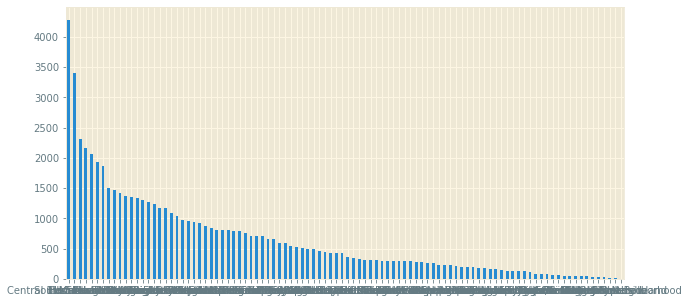

In [26]:
chart.plot.bar(rot = 0)

This is too much information at once. You cannot even read the names of the neighborhoods in this visualization. Here is a simpler format where you can better understand which neighborhoods have low crime rates.

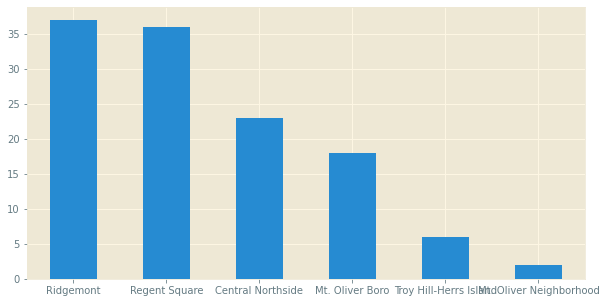

In [27]:
detailed = chart.tail(6)
detailed.plot.bar(rot = 0)

Conclusion for Metric 3:

**Final Analysis and Overarching Conclusion**

This is ...